In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("combined.csv")

In [ ]:
df

,seg_start,bytes,count,losses,max_latency,mean_latency,median_latency,min_latency,mode_latency,n_latency
0,0,262037,360,9,0.061867,0.005747,0.000193,0.000003,0.000131,91
1,1,672088,498,38,0.299009,0.009166,0.000290,0.000028,0.000274,125
2,2,144672,285,6,0.443445,0.010901,0.000271,0.000028,0.000316,67
3,3,31607,216,2,0.060713,0.004863,0.000207,0.000048,0.000108,40
4,4,23400,203,1,0.483962,0.015992,0.000462,0.000046,0.000063,46
...,...,...,...,...,...,...,...,...,...,...
23895,23895,31022354,9453,1235,0.070857,0.016471,0.024489,0.000008,0.000054,1448
23896,23896,30806920,9213,1272,0.190173,0.017059,0.024490,0.000008,0.000082,1377
23897,23897,30567720,9566,1212,0.062826,0.016864,0.024559,0.000006,0.000091,1445
23898,23898,26414329,6868,1085,0.730917,0.015649,0.023551,0.000002,0.000064,1028


In [ ]:
pip install scapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.9 MB/s eta 0:00:00


In [ ]:
from scapy.all import *

packets = rdpcap('11-01-22-34-39-1730489679.pcap')

for packet in packets:
    print(packet.summary())


Выходные данные были обрезаны до нескольких последних строк (5000).
Ether / IP / TCP 188.191.166.31:49094 > 188.44.42.233:12223 A
Ether / IP / TCP 188.191.166.31:49094 > 188.44.42.233:12223 A
Ether / IP / TCP 188.191.166.31:49094 > 188.44.42.233:12223 A
Ether / IP / TCP 188.191.166.31:49094 > 188.44.42.233:12223 A
Ether / Dot1Q / IP / TCP 188.44.42.233:12223 > 188.191.166.31:49094 A / Raw
Ether / Dot1Q / IP / TCP 188.44.42.233:12223 > 188.191.166.31:49094 A
Ether / IP / TCP 188.191.166.31:49094 > 188.44.42.233:12223 A
Ether / IP / TCP 188.191.166.31:49094 > 188.44.42.233:12223 A
Ether / IP / TCP 188.191.166.31:49094 > 188.44.42.233:12223 A
Ether / IP / TCP 188.191.166.31:49094 > 188.44.42.233:12223 PA / Raw
Ether / IP / TCP 188.191.166.31:49094 > 188.44.42.233:12223 A
Ether / IP / TCP 188.191.166.31:49094 > 188.44.42.233:12223 A
Ether / IP / TCP 188.191.166.31:49094 > 188.44.42.233:12223 A
Ether / IP / TCP 188.191.166.31:49094 > 188.44.42.233:12223 A
Ether / IP / TCP 188.191.166.31:490

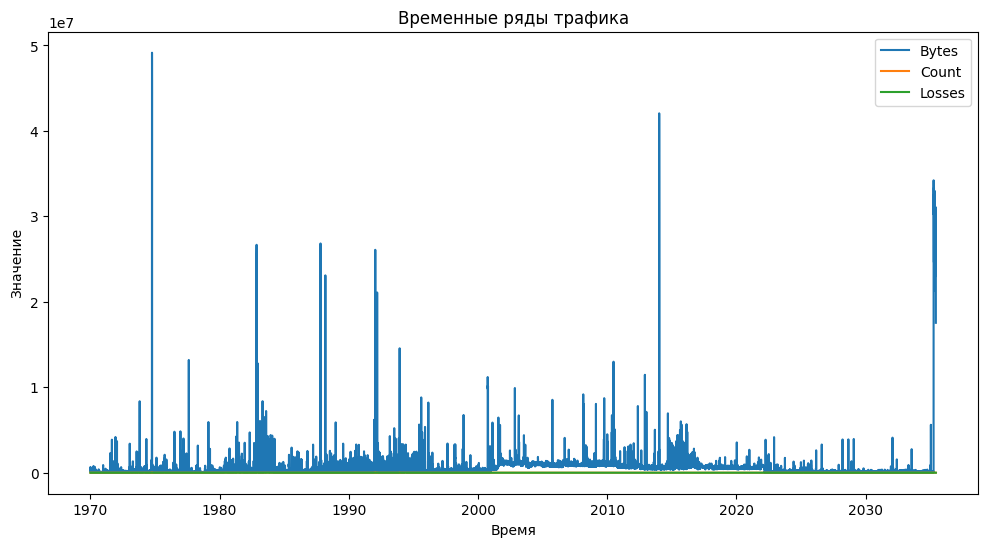

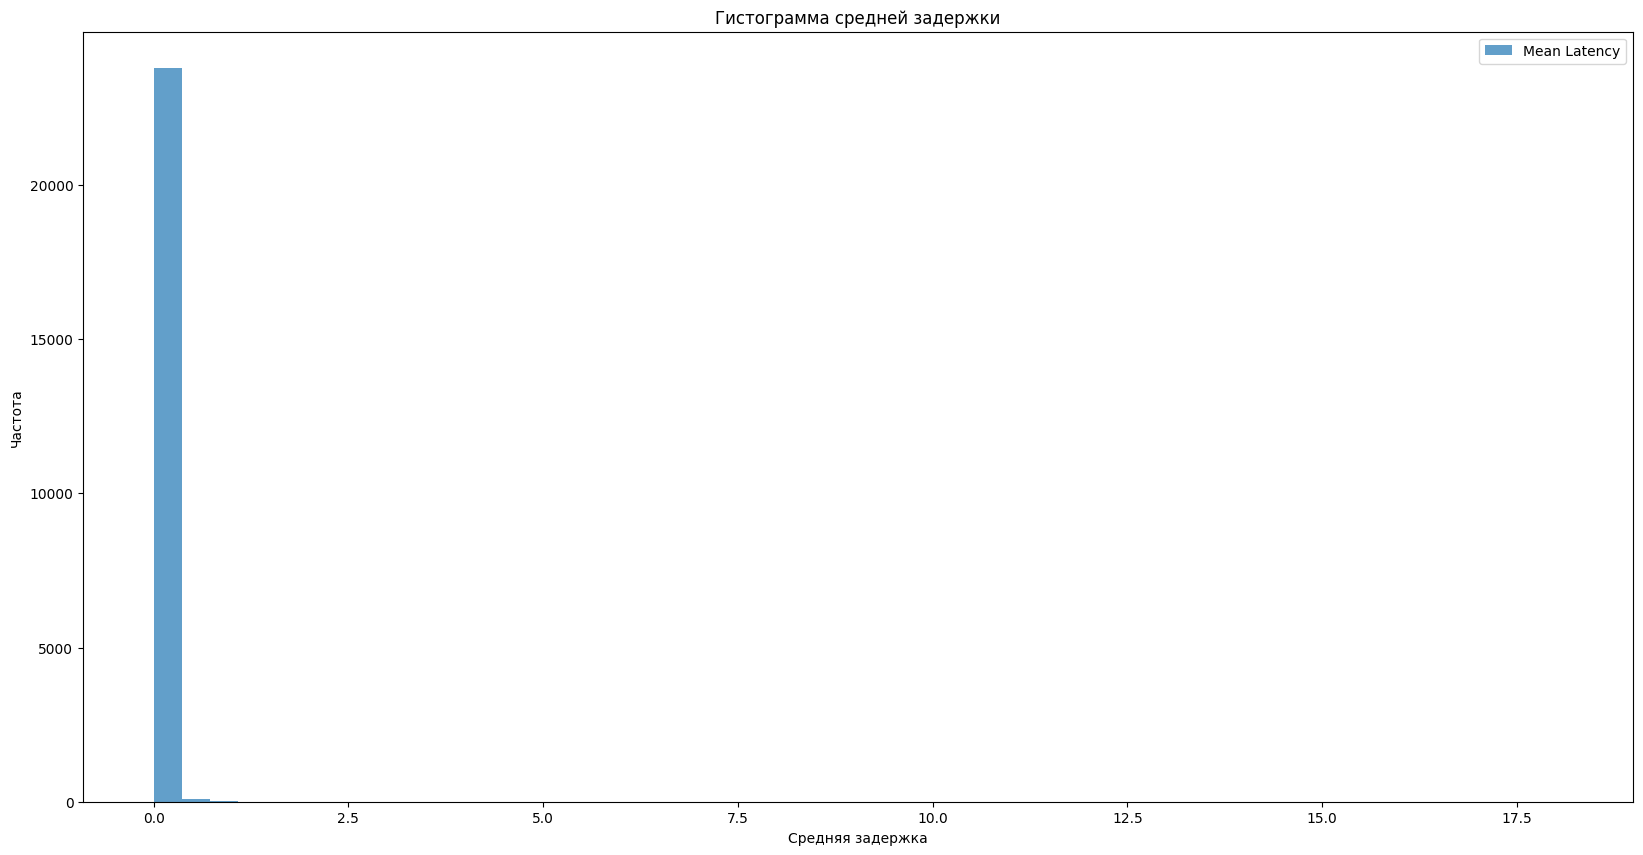

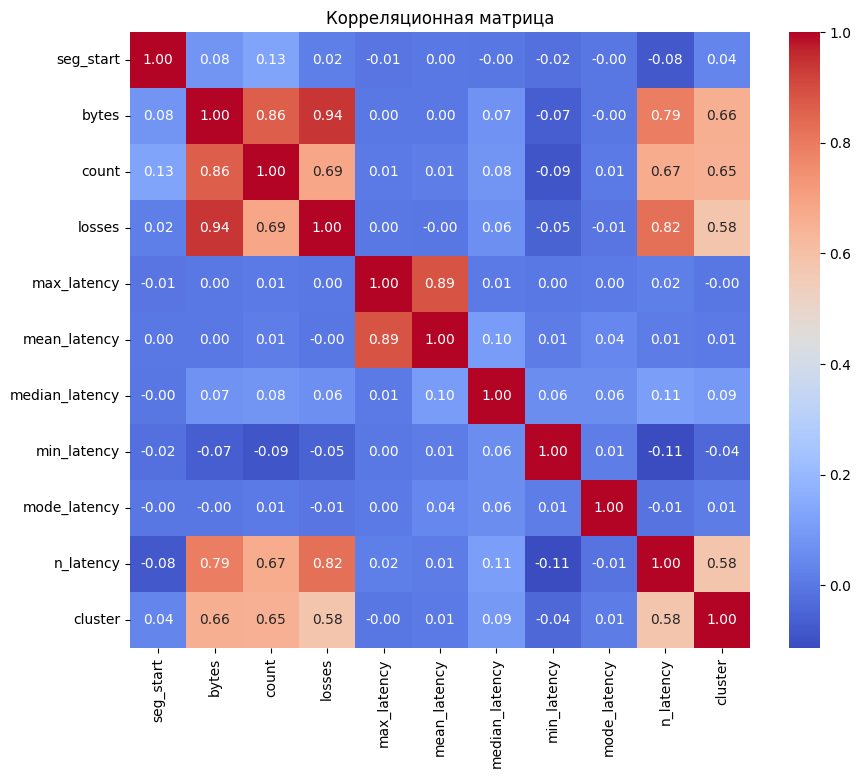

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from prophet import Prophet


plt.figure(figsize=(12, 6))
plt.plot(df['seg_start'], df['bytes'], label='Bytes')
plt.plot(df['seg_start'], df['count'], label='Count')
plt.plot(df['seg_start'], df['losses'], label='Losses')
plt.title('Временные ряды трафика')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

# Гистограмма средней задержки
plt.figure(figsize=(20, 10))
plt.hist(df['mean_latency'], bins=50, alpha=0.7, label='Mean Latency')
plt.title('Гистограмма средней задержки')
plt.xlabel('Средняя задержка')
plt.ylabel('Частота')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# # Автокорреляция средней задержки
# plot_acf(df['mean_latency'])
# plt.title('Автокорреляция средней задержки')
# plt.show()

# p, d, q = 1, 1, 1
# model = ARIMA(df['bytes'], order=(p, d, q))
# model_fit = model.fit()
# forecast = model_fit.forecast(steps=10)
# print("Прогноз значений Bytes:")
# print(forecast)

# df_prophet = df.rename(columns={'seg_start': 'ds', 'bytes': 'y'})
# model = Prophet()
# model.fit(df_prophet)
# future = model.make_future_dataframe(periods=10)
# forecast = model.predict(future)
# model.plot(forecast)
# plt.show()


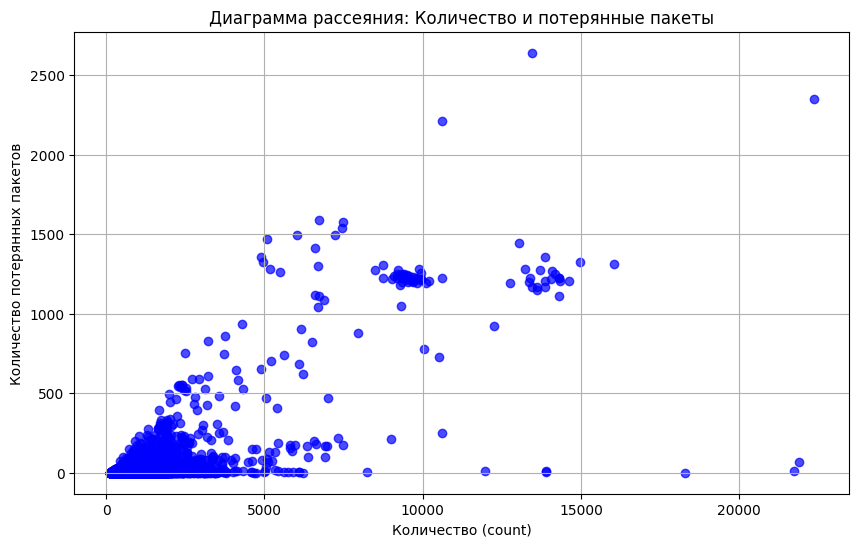

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['count'], df["losses"], color='b', marker='o', alpha=0.7)
plt.title('Диаграмма рассеяния: Количество и потерянные пакеты')
plt.xlabel('Количество (count)')
plt.ylabel('Количество потерянных пакетов')
plt.grid()
plt.show()


In [ ]:
	seg_start	bytes	count	losses	max_latency	mean_latency	median_latency	min_latency	mode_latency	n_latency

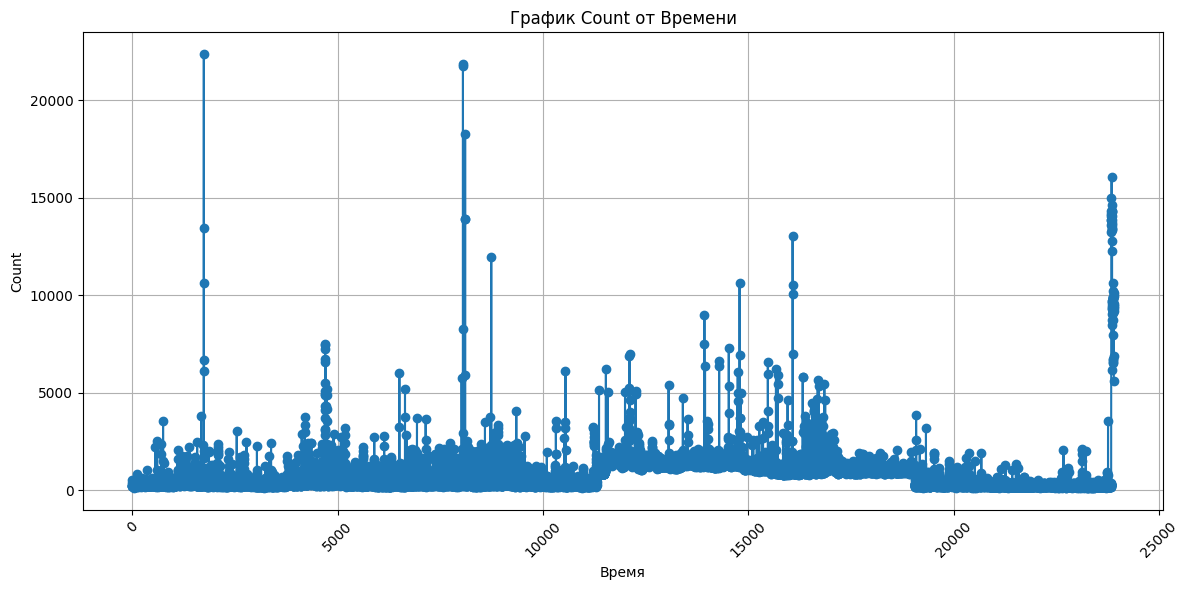

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['seg_start'], df['count'], marker='o', linestyle='-')
plt.title('График Count от Времени')
plt.xlabel('Время')
plt.ylabel('Count')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


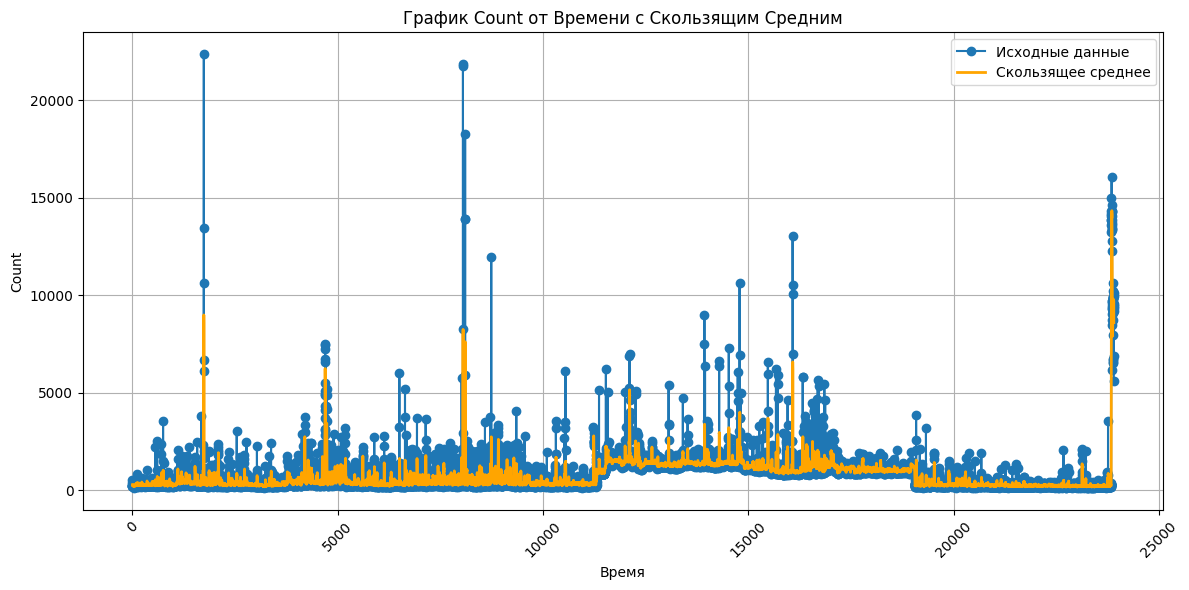

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

window_size = 7
df['moving_average'] = df['count'].rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['seg_start'], df['count'], marker='o', linestyle='-', label='Исходные данные')
plt.plot(df['seg_start'], df['moving_average'], color='orange', label='Скользящее среднее', linewidth=2)
plt.title('График Count от Времени с Скользящим Средним')
plt.xlabel('Время')
plt.ylabel('Count')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


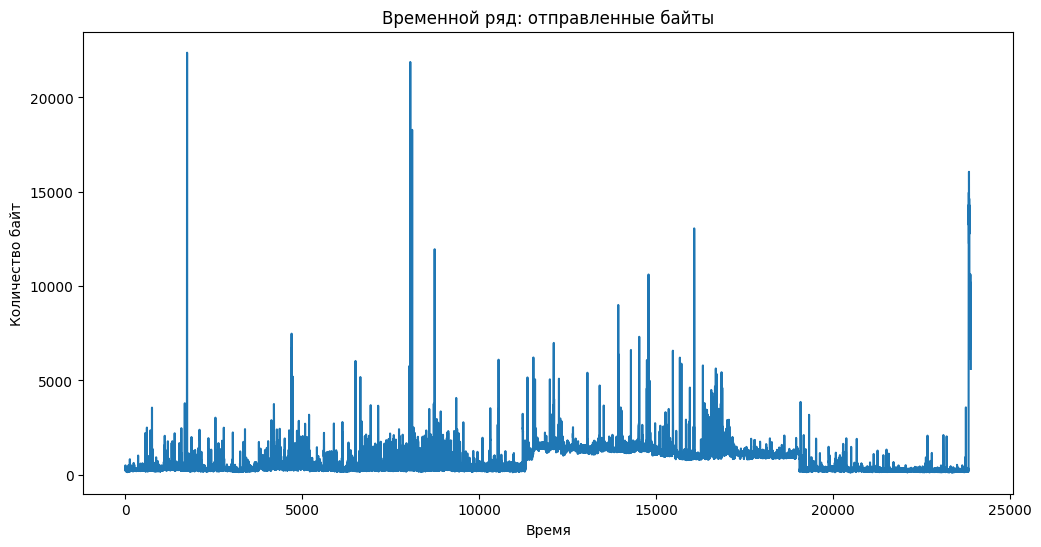

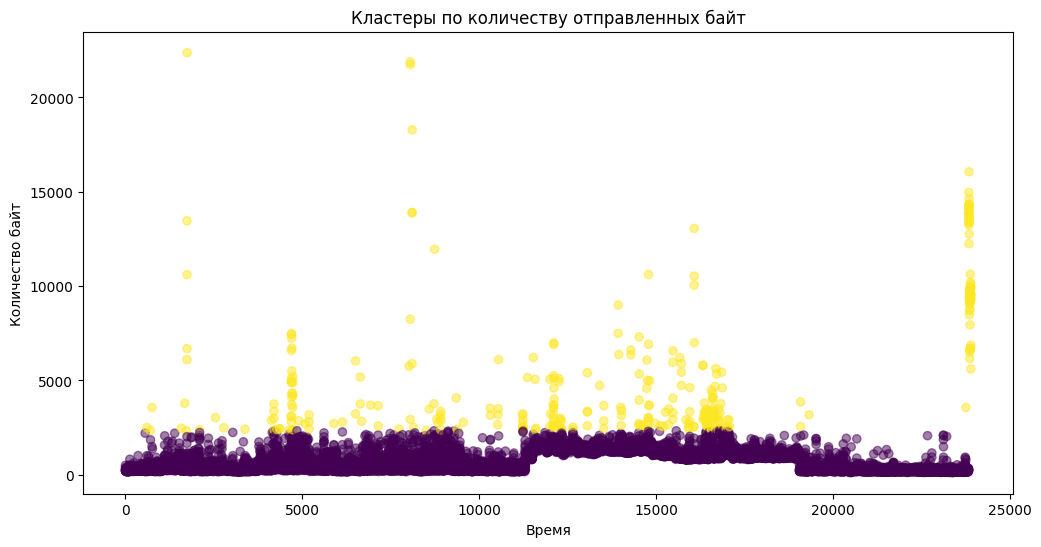

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['seg_start'], df['count'])
plt.title('Временной ряд: отправленные байты')
plt.xlabel('Время')
plt.ylabel('Количество байт')
plt.show()

from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=2)
data = df['count'].values.reshape(-1, 1)
gmm.fit(data)

labels = gmm.predict(data)
df['cluster'] = labels

plt.figure(figsize=(12, 6))
plt.scatter(df['seg_start'], df['count'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Кластеры по количеству отправленных байт')
plt.xlabel('Время')
plt.ylabel('Количество байт')
plt.show()



#Вроде ничего не даёт, решил посмотреть как работает GMM

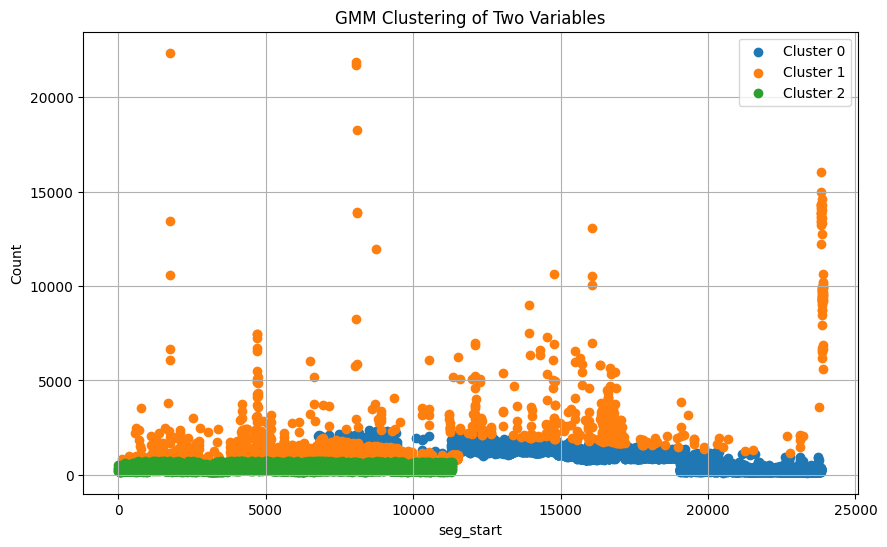

In [ ]:
X = df[['seg_start', 'count']].values

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

labels = gmm.predict(X)

df['Cluster'] = labels

plt.figure(figsize=(10, 6))
for cluster in np.unique(labels):
    plt.scatter(df[df['Cluster'] == cluster]['seg_start'],
                df[df['Cluster'] == cluster]['count'],
                label=f'Cluster {cluster}')

plt.title('GMM Clustering of Two Variables')
plt.xlabel('seg_start')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

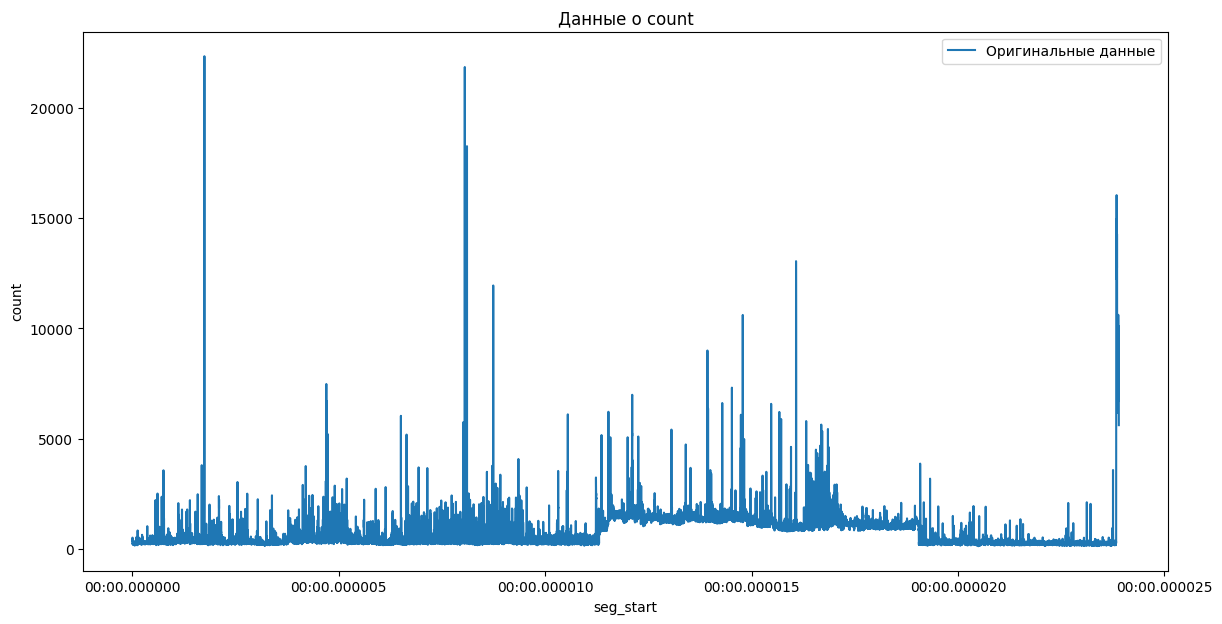

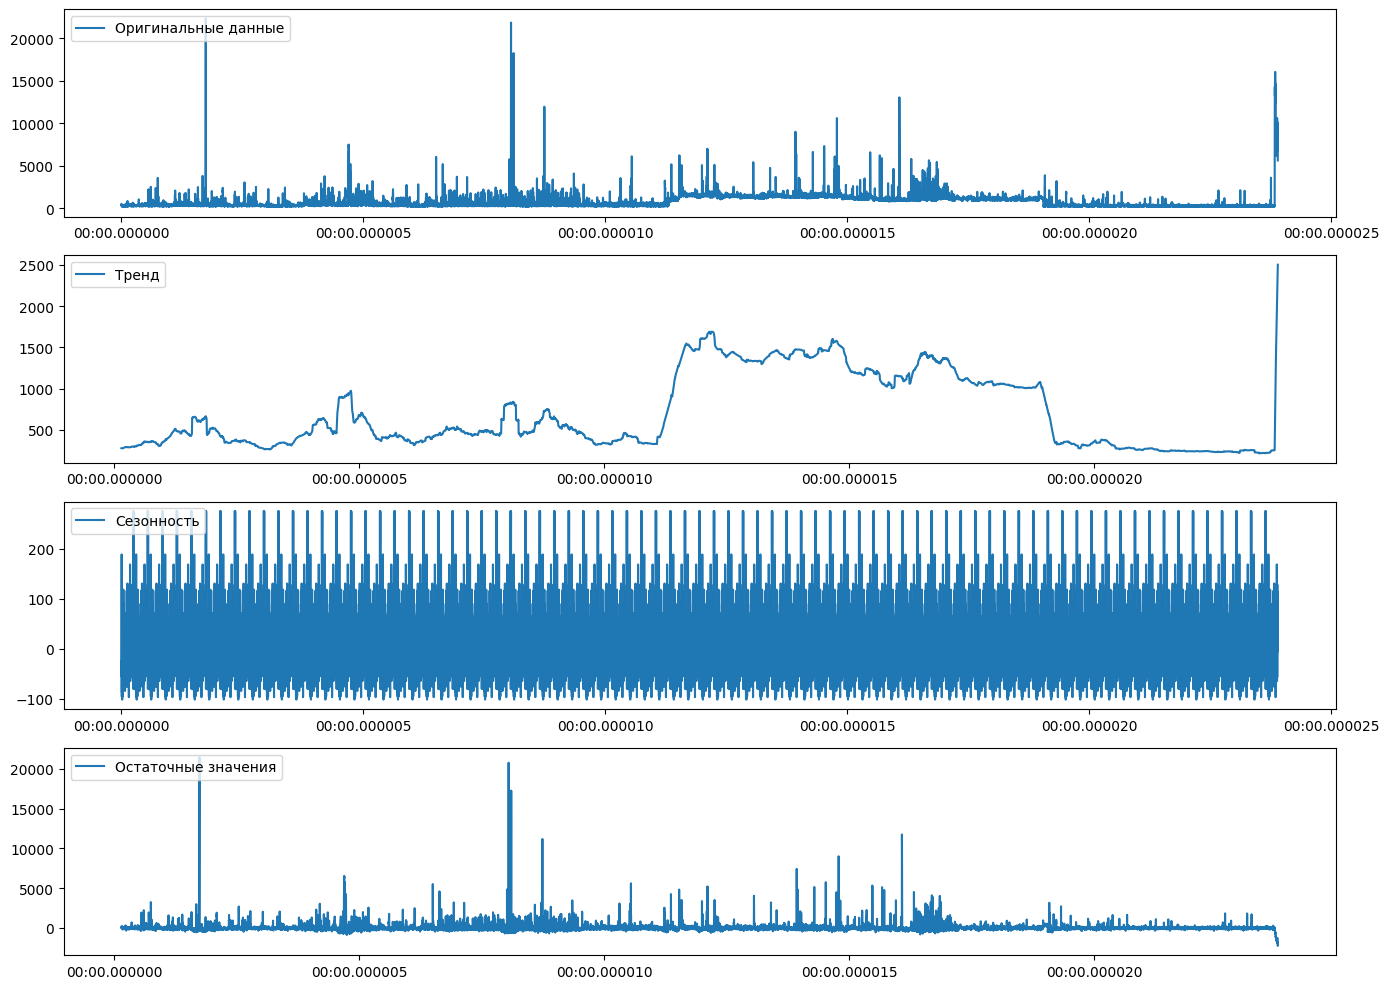

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['count'], label='Оригинальные данные')
plt.xlabel('seg_start')
plt.ylabel('count')
plt.title('Данные о count')
plt.legend()
plt.show()

decomposition = seasonal_decompose(df['count'], model='additive', period=300)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(df.index, df['count'], label='Оригинальные данные')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(df.index, trend, label='Тренд')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(df.index, seasonal, label='Сезонность')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(df.index, residual, label='Остаточные значения')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


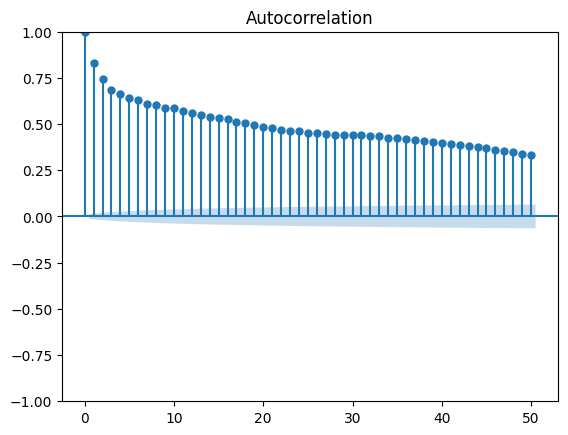

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
df.set_index('seg_start', inplace=True)

#  ACF
plot_acf(df['count'], lags=50)
plt.show()
